#               **Housing Markets - A Comprehensive Study**

The Housing Market(s) refers to the supply and demand of houses including mortgage market and house prices.This project will answer many essential questions on the housing prices ,mortage ,interest rates,speculative demand ,supply of housing, affordability and economic growth.The stake-holders will get a valuable cognizance of the housing prices utilizing the plots and graphs presented in this project.

---

# **Installing Dependencies**
Importing all requisite libraries.







In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


# **Importing the dataset**
The dataset is taken from [kaggle.com](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot).This contains data about Real-estate being sold in Melborune. 

In [3]:
!pip install jovian opendatasets --upgrade --quiet


In [4]:
dataset_url = "https://www.kaggle.com/dansbecker/melbourne-housing-snapshot"

In [5]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: srikararanganath
Your Kaggle Key: ··········


100%|██████████| 451k/451k [00:00<00:00, 44.8MB/s]

The Data Set has been Downloaded from Kaggle.


In [6]:
data_dir = "./melbourne-housing-snapshot"

In [7]:
import os 
os.listdir(data_dir)

['melb_data.csv']

Imported the dataset into the notebook

# **Data Preparation and Cleaning**
Creating a data-frame 'housing_df' using pandas.

In [8]:
housing_df = pd.read_csv("./melbourne-housing-snapshot/melb_data.csv")

In [9]:
housing_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [10]:
housing_df.shape

(13580, 21)

We have 13580 rows of housing data.Lets list all the series elements to get some insight about the data were working with.

In [11]:
housing_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Employing a bunch of functions to analyze data in the dataFrame.












In [12]:
housing_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


We are going to consider data from the year 1950 we all real-estate sold before 1950 needs to be discarded .

In [13]:
housing_df.drop(housing_df[housing_df["YearBuilt"] < 1950].index, inplace=True)

In [14]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11428 entries, 0 to 13577
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         11428 non-null  object 
 1   Address        11428 non-null  object 
 2   Rooms          11428 non-null  int64  
 3   Type           11428 non-null  object 
 4   Price          11428 non-null  float64
 5   Method         11428 non-null  object 
 6   SellerG        11428 non-null  object 
 7   Date           11428 non-null  object 
 8   Distance       11428 non-null  float64
 9   Postcode       11428 non-null  float64
 10  Bedroom2       11428 non-null  float64
 11  Bathroom       11428 non-null  float64
 12  Car            11393 non-null  float64
 13  Landsize       11428 non-null  float64
 14  BuildingArea   5276 non-null   float64
 15  YearBuilt      6053 non-null   float64
 16  CouncilArea    10240 non-null  object 
 17  Lattitude      11428 non-null  float64
 18  Longti

**Checking for null values**


In [15]:
housing_df.isnull().values.any()

True

As we can see the dataframe contains null values.Lets plot a heatmap to visualize the null values.

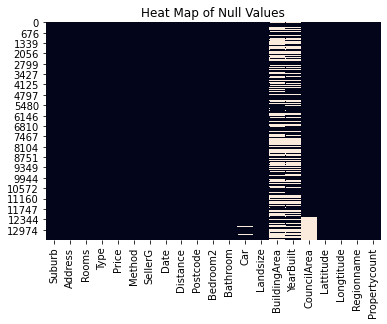

In [16]:
sns.heatmap(housing_df.isnull(), cbar=False)
plt.title("Heat Map of Null Values")
plt.show()

In [17]:
housing_df.isnull().sum()


Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                35
Landsize            0
BuildingArea     6152
YearBuilt        5375
CouncilArea      1188
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

As we can see 'BuildingArea' has maximum number of null values.'YearBuilt','CouncilArea' and 'Car' have 5375 ,1369 and 62 number of null values respectively.I will delete the rows which contain null values to make the visualization more precise.

In [18]:
housing_df["BuildingArea"].fillna(housing_df["BuildingArea"].mean(),inplace=True)
housing_df.dropna(subset=["YearBuilt"],inplace=True)
housing_df["Car"].fillna(housing_df["Car"].mean(),inplace=True)
housing_df.dropna(subset=["CouncilArea"],inplace=True)

In [19]:
housing_df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Now the dataframe is void of null values.



# **Splitting the dataframe**
Dividing the dataframe into 3 dataframes based on 'Type' which has 3 unique values

*   h : house,cottage,villa, semi,terrace
*   u : unit, duplex
*   t : townhouse




In [20]:
housing_df["Type"].unique()

array(['h', 'u', 't'], dtype=object)

In [21]:
house_df = housing_df[housing_df["Type"] == "h"].copy()
house_df.sample(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8072,Malvern East,2 Rotherwood Dr,4,h,1715157.0,S,Jellis,20/05/2017,11.2,3145.0,4.0,3.0,2.0,380.0,160.000000,2008.0,Stonnington,-37.8792,145.0869,Southern Metropolitan,8801.0
1914,Coburg,37 Elizabeth St,3,h,680000.0,S,Nelson,3/12/2016,7.8,3058.0,3.0,1.0,0.0,702.0,108.000000,1950.0,Moreland,-37.7391,144.9812,Northern Metropolitan,11204.0
4417,Northcote,2B Creek Pde,4,h,2270000.0,S,Collins,10/12/2016,5.5,3070.0,4.0,2.0,2.0,440.0,152.080145,1992.0,Darebin,-37.7852,144.9975,Northern Metropolitan,11364.0


In [22]:
unit_df = housing_df[housing_df["Type"] == "u"].copy()
unit_df.sample(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2596,Fitzroy North,8/54 Kneen St,1,u,330000.0,VB,Jellis,19/11/2016,3.5,3068.0,1.0,1.0,1.0,0.0,152.080145,1970.0,Yarra,-37.78200,144.98960,Northern Metropolitan,6244.0
10735,Malvern,4/30 Finlayson St,1,u,338000.0,SP,hockingstuart,8/07/2017,5.9,3144.0,1.0,1.0,1.0,0.0,152.080145,1970.0,Stonnington,-37.87012,145.03545,Southern Metropolitan,4675.0
11165,Prahran,4/24 Grandview Gr,1,u,400000.0,VB,hockingstuart,12/08/2017,4.6,3181.0,1.0,1.0,2.0,0.0,50.000000,1960.0,Stonnington,-37.85126,145.00832,Southern Metropolitan,7717.0


In [23]:
townhouse_df = housing_df[housing_df["Type"] == "t"].copy()
townhouse_df.sample(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
3283,Heidelberg West,2/287 Liberty Pde,2,t,370000.0,VB,Miles,7/05/2016,9.4,3081.0,2.0,1.0,1.0,100.0,90.0,2013.0,Banyule,-37.7383,145.0360,Eastern Metropolitan,2674.0
7730,Chadstone,1/29 Atkinson St,3,t,905000.0,S,Buxton,20/05/2017,13.6,3148.0,3.0,1.0,2.0,418.0,132.0,1955.0,Monash,-37.8860,145.0960,Southern Metropolitan,3582.0
8655,Moorabbin,3/29 Fiddes St,2,t,742500.0,S,Buxton,13/05/2017,14.6,3189.0,2.0,1.0,1.0,179.0,101.0,2001.0,Kingston,-37.9369,145.0473,Southern Metropolitan,2555.0


# **Exploratory Analysis and Visualization**
> Let us compare the different types of real-estate sold in Melbourne.







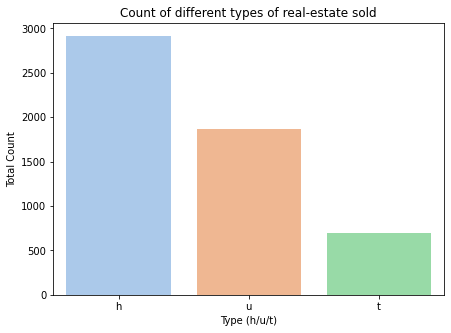

In [24]:
plt.figure(figsize=(7,5))
sns.countplot(x = housing_df.Type,palette="pastel")
plt.title("Count of different types of real-estate sold")
plt.xlabel("Type (h/u/t)")
plt.ylabel("Total Count")
plt.show()

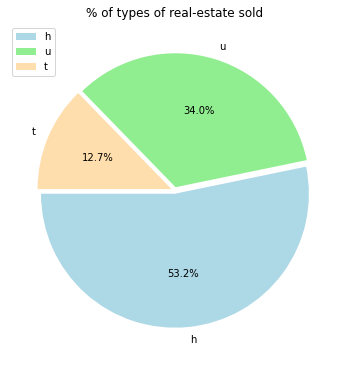

In [25]:
plt.figure(figsize=(6,10))
plt.pie(x = housing_df.Type.value_counts(),labels=housing_df.Type.value_counts().index,startangle=180,autopct='%1.1f%%',explode=(0.025,0.025,0.025) ,colors=["lightblue","lightgreen","navajowhite"])
plt.title("% of types of real-estate sold")
plt.legend()
plt.show()

Type houses("h") accounts to 62% of real-estate sold in Melbourne with 6000+ homes being sold .This is because a lot of people are looking for residence here as Melbourne is a tier-1 City with all amenities and a decent number of tourist places.A tier-1 city which needs to cater to the needs of unviersity dorms ,private housing,gated communities has close to 3000 units("u") which accounts to 28%.The last type is townhouse("t") which accounts to the last 10%.A little over 1000 townhouses have been sold to make corporate offices ,goverment buildings.

**DIFFERENT METHODS OF SELLING**


> Now let's look at how real-estate is being sold.Different method's are being listed below :



*   S - property sold
*   SP - property sold prior
*   PI - property passed in
*   VB - vendor bid
*   SA - sold after auction





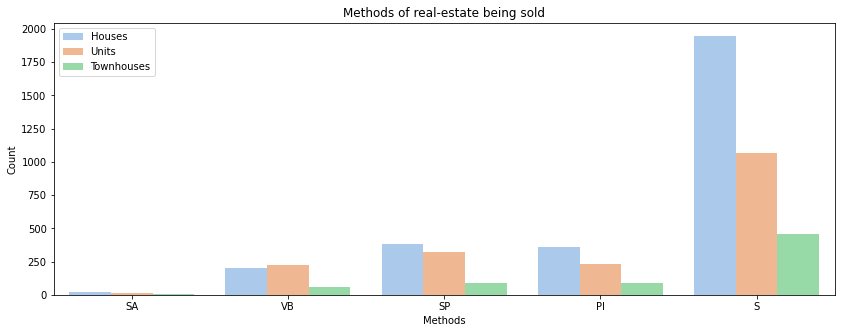

In [26]:
plt.figure(figsize=(14,5))
plt.title("Methods of real-estate being sold")
sns.countplot(x = housing_df.Method, hue=housing_df.Type, order=["SA","VB","SP","PI","S"] ,palette="pastel")

plt.xlabel("Methods")
plt.ylabel("Count")
plt.legend(["Houses","Units","Townhouses"])
plt.show()

It can be seen that that maximum number of real estate across all types(h/u/t)
has been sold via "S" method which is direct selling which is followed by PI SP AND VB.Real-estate sold via SA is very low.

**Year of Construction Of Real Estate**
> Let us analyze the year in which Real-estate sold in Melbourne was built from 1950 - 2018 .This impacts the housing market as a newer construction would be worth more and its easier to sell.

In [27]:
year_df = housing_df["YearBuilt"].value_counts().to_frame().reset_index().rename(columns={'index': 'Year','YearBuilt':'Count'})
year_df

,Year,Count
0,1970.0,804
1,1960.0,658
2,1950.0,526
3,1980.0,277
4,2000.0,276
...,...,...
64,1981.0,3
65,1964.0,3
66,1954.0,3
67,1959.0,2


As we can see 804 landholdings have been built in the Year 1970

In [28]:
year2_df = housing_df[["Type","YearBuilt"]]
house_year = year2_df[year2_df["Type"]=="h"].YearBuilt.value_counts().to_frame().reset_index().rename(columns={'index': 'Year','YearBuilt':'Count'})
unit_year = year2_df[year2_df["Type"]=="u"].YearBuilt.value_counts().to_frame().reset_index().rename(columns={'index': 'Year','YearBuilt':'Count'})
townhouse_year = year2_df[year2_df["Type"]=="t"].YearBuilt.value_counts().to_frame().reset_index().rename(columns={'index': 'Year','YearBuilt':'Count'})

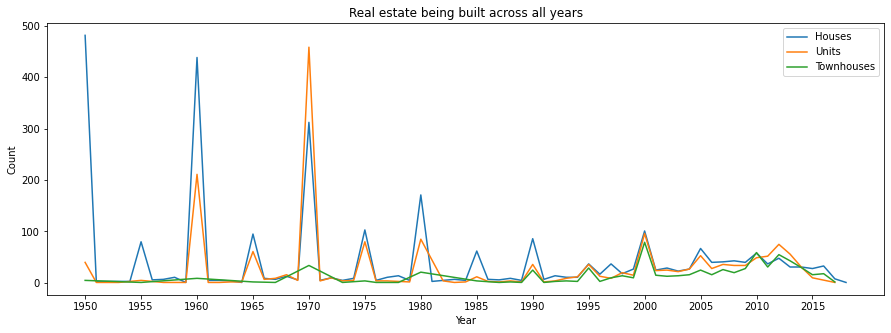

In [29]:
fig,ax = plt.subplots(figsize = (15,5))
plt.title("Real estate being built across all years")
sns.lineplot(data=house_year, x='Year', y='Count')
sns.lineplot(data=unit_year, x='Year', y='Count')
sns.lineplot(data=townhouse_year, x='Year', y='Count')
ax.set(xticks=np.arange(1950, 2019, 5))

plt.legend(['Houses','Units','Townhouses'])
plt.show()

Clearly we see a spike in Years 1960 and 1970 and there is not much movement after 1970 apart from minute spikes  on 1975 ,1980,1990 and 2000.Maximum number of real-estate has been built in the years 1960-1980 across all three types.This suggests than a construction between the years 1960-1980 is fairly modern and suffices the needs of the buyers.

**SUBURBS WITH HIGH SALES**


> Let us check out the Suburbs in which maximum number of real estate has been sold.



In [30]:
filtered_housing_df = housing_df.Suburb.value_counts().to_frame().reset_index().rename(columns={"index":"Suburb","Suburb":"Count"})
filtered_housing_df = filtered_housing_df.head(20)

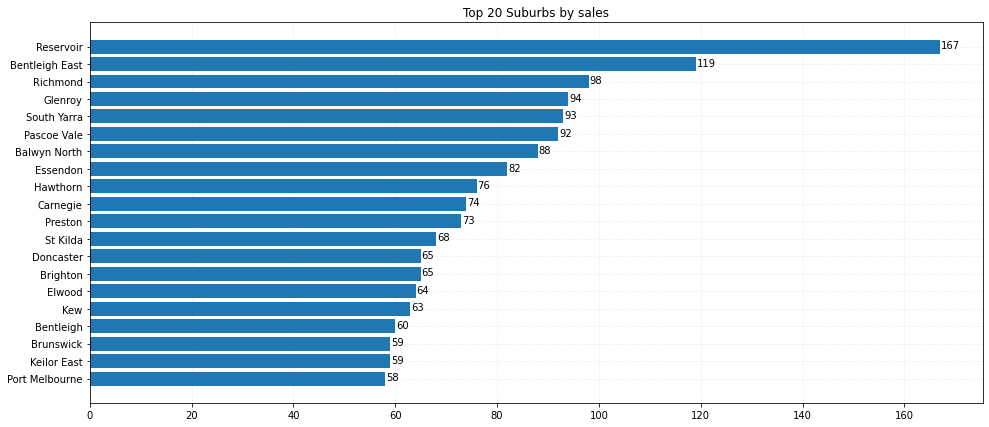

In [31]:
fig, ax = plt.subplots(figsize =(16, 7)) 
plt.title("Top 20 Suburbs by sales")
ax.barh(filtered_housing_df["Suburb"],filtered_housing_df["Count"]) 
ax.invert_yaxis() 
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2) 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  str(round((i.get_width()), 2)), fontsize = 10, fontweight ='regular', color ='black') 
plt.show()

Here is a plot of top 20 Suburbs by sales.'Reservoir' has the maximum number of sales of 167 followed by 'Bentleigh East' having 119 number of sales.The rest vary from 58 to 98 with no significant difference in sales.This says that Suburbs 'Reservoir' and 'Bentleigh East' are your go-to suburbs as your locality is very important while buying any type of real-estate.

**Number of Rooms**
>We are going to analyze the sales based on number of rooms.Number of Rooms is very important as it says how well the sapce is divided and what buyers are looking for.

In [32]:
rooms_df = housing_df["Rooms"].value_counts().to_frame().reset_index().rename(columns={"index":"Rooms","Rooms":"Count"})

,Rooms,Count
0,3,2144
1,2,1712
2,4,974
3,1,400
4,5,219
5,6,18
6,7,7
7,8,2
8,10,1


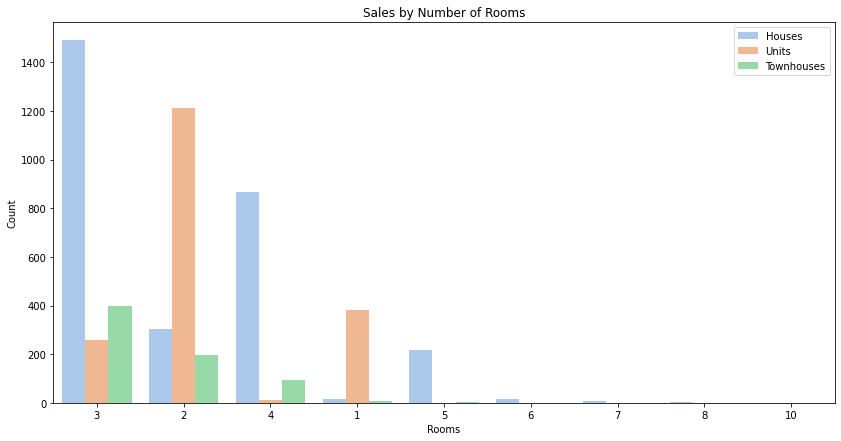

In [33]:
display(rooms_df)
plt.figure(figsize=(14,7))
plt.title("Sales by Number of Rooms")
sns.countplot(x = housing_df.Rooms, hue=housing_df.Type, order=[3,2,4,1,5,6,7,8,10] ,palette="pastel")

plt.xlabel("Rooms")
plt.ylabel("Count")
plt.legend(["Houses","Units","Townhouses"], loc="upper right")
plt.show()

Overall sales of Rooms 0-4 occupies 90% with 3 Rooms houses being sold the most and 2 room units being sold the most.The sale of 6+ Room real-estate is negligible .This says that buyers are mostly looking for real-esate with 0-3 Rooms.

# **Sales By Post-Codes**
>Lets Plot the sales of real-estate by Post-Codes.

In [34]:
postcode_df = housing_df.Postcode.value_counts().to_frame().reset_index().rename(columns={"index":"PostCode","Postcode":"Count"})
postcode_df = postcode_df.head(20)
postcode_df = postcode_df.sort_values("PostCode",ascending=True)

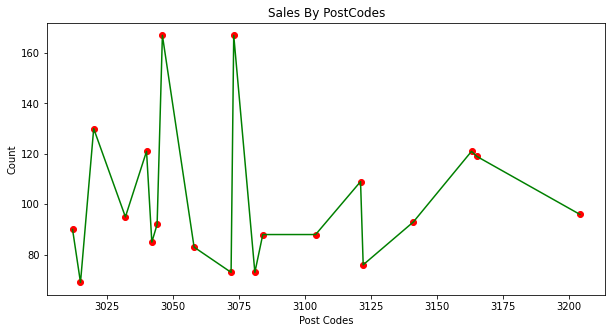

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(postcode_df["PostCode"],postcode_df["Count"], color="r");
plt.plot(postcode_df["PostCode"],postcode_df["Count"],color="g");

plt.xlabel("Post Codes")
plt.ylabel("Count")
plt.title("Sales By PostCodes")
plt.show()

Post-Codes 3043 and 3069 have highest number of sales.There is a lot of variation observed in this plot.We can say that real-estate has been spread out across Melbourne and the buying is heavy in some Post-Codes.

**Q) Sales By Bath Rooms and Car Spots**


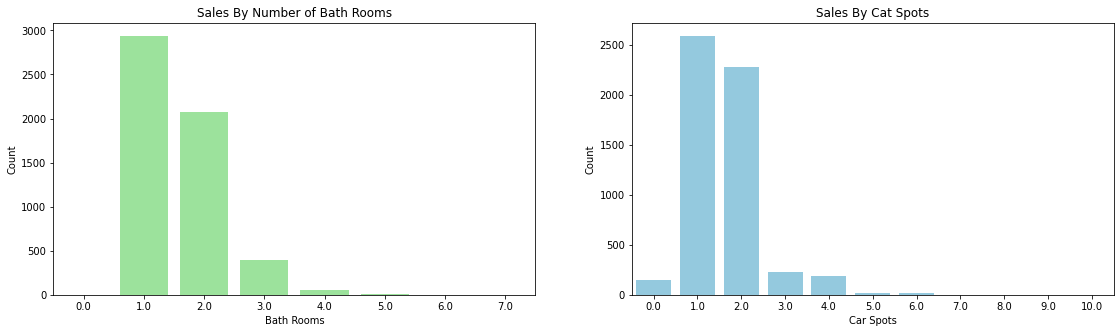

In [36]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
p1 = sns.countplot(x=housing_df.Bathroom, color='lightgreen',ax=ax[0]);
p1.set_title("Sales By Number of Bath Rooms")
p1.set_ylabel("Count")
p1.set_xlabel("Bath Rooms")
p2 = sns.countplot(x=housing_df.Car, color='skyblue',ax=ax[1]);
p2.set_title("Sales By Cat Spots")
p2.set_ylabel("Count")
p2.set_xlabel("Car Spots")
fig.show()

> From the plot we can say that land holdings with 1 Bath Room and 1 Car spot are being sold the highest followed by landholdings with 2 Bathrooms and Car Spots.Sales from other variables seem insignificant. 

**Q) Sales based on Distance from the City Center**




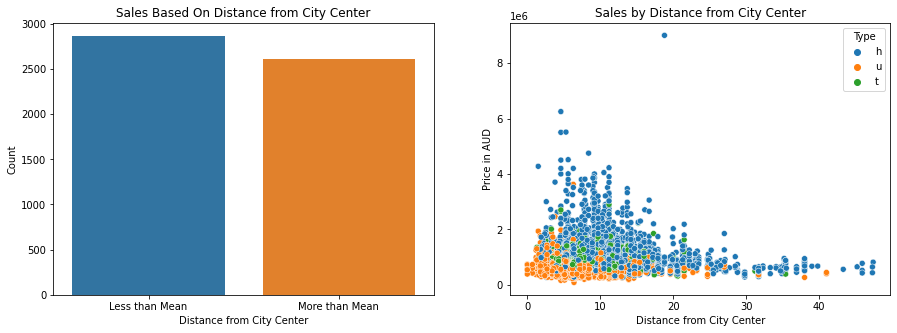

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.scatterplot(x=housing_df["Distance"],y=housing_df["Price"],hue=housing_df.Type);
plt.title("Sales by Distance from City Center")
plt.xlabel("Distance from City Center")
plt.ylabel("Price in AUD")

plt.subplot(1,2,1)
mean_dist = housing_df["Distance"].mean()
less_dist = housing_df[housing_df["Distance"]<mean_dist].shape[0]
more_dist = housing_df[housing_df["Distance"]>mean_dist].shape[0]
distance_df = pd.DataFrame({"Distance":["Less than Mean","More than Mean"], "Count":[less_dist,more_dist]})
sns.barplot(y=distance_df["Count"],x=distance_df["Distance"])
plt.title('Sales Based On Distance from City Center')        
plt.xlabel('Distance from City Center')
plt.ylabel('Count')
plt.show()

>It can be seen that Sale of Real Esate with distance more than the mean is greater than Real Estate with distance less than the mean.Although there is not much difference.Buy sales across all types is very high for distance in the range 0 to 15 which can be seen in the scatter plot.

**Q) Do Building Size and Land Area affect the Price ?**

In [38]:
building_area_df = housing_df[housing_df["YearBuilt"]==2017]
land_size_df = housing_df[housing_df["YearBuilt"]==2017]

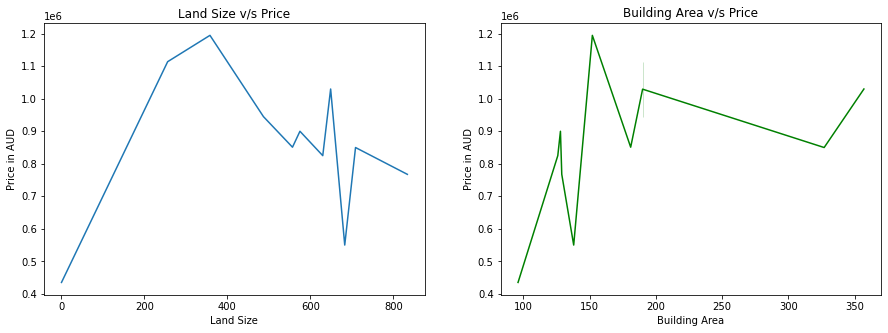

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.lineplot(data=building_area_df, x='BuildingArea', y='Price',color="g");
plt.title("Building Area v/s Price")
plt.xlabel("Building Area")
plt.ylabel("Price in AUD")

plt.subplot(1,2,1)
sns.lineplot(data=land_size_df, x='Landsize', y='Price');
plt.title("Land Size v/s Price")
plt.xlabel("Land Size")
plt.ylabel("Price in AUD")
plt.show()


>Building Area and Land Size have a significant impact on the Price.In the above plot we are going to consider data from the year 2017.It can be seen that the overall trend is upward for both parameters.The slight Corrections are caused due to variotions in region in the data.Overall we can say that Land Size and Building Area have a liner relationship with Price.

**Q) What are the Top 5 Suburbs based on Property Count**

In [40]:
property_count_df = housing_df.groupby("Suburb")["Propertycount"].unique().head(5).to_frame().reset_index()
my_circle=plt.Circle( (0,0), 0.7, color='white')

,Suburb,Propertycount
0,Abbotsford,[4019.0]
1,Aberfeldie,[1543.0]
2,Airport West,[3464.0]
3,Albanvale,[1899.0]
4,Albert Park,[3280.0]


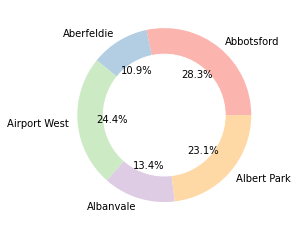

In [41]:
display(property_count_df)
from palettable.colorbrewer.qualitative import Pastel1_7
plt.pie(property_count_df["Propertycount"], labels=property_count_df["Suburb"], colors=Pastel1_7.hex_colors,autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

>Here are the Top 5 Suburbs based on Property Count.As we can see Abbotsford has the highest number of properties accounting to 28.3% followed by Albert Park and Airport West accounting to 23% and 24% respectively.Albanvale and Aberfeldie account to 11% and 13% of gross sales.

**Q) What are the Total Sales in all Regions in Melbourne?**

In [42]:
region_df = housing_df["Regionname"].value_counts().to_frame().reset_index().rename(columns={"index":"RegionName","Regionname":"Count"})

,RegionName,Count
0,Southern Metropolitan,1856
1,Northern Metropolitan,1542
2,Western Metropolitan,1209
3,Eastern Metropolitan,634
4,South-Eastern Metropolitan,176
5,Eastern Victoria,25
6,Northern Victoria,18
7,Western Victoria,17


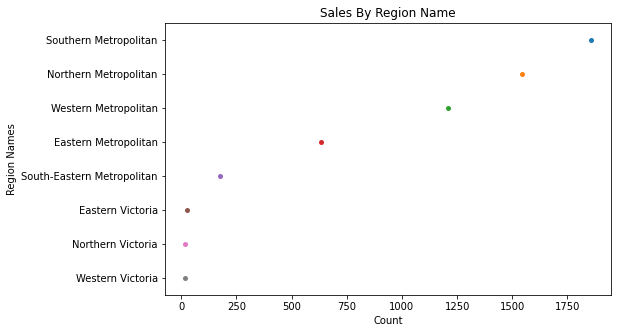

In [43]:
display(region_df)
plt.figure(figsize=(8,5))
sns.swarmplot(x='Count',y='RegionName', data=region_df)
plt.title("Sales By Region Name")
plt.xlabel("Count")
plt.ylabel("Region Names")
plt.show()

>Here are the sales number of all Regions in Melbourne.We can see that sales in Southern,Northern and Western Metropolitan are 4 digit numbers.These are followed by Eastern and South-Eastern with mediocre sales.Lastly sasles in Eastern ,Northern and Western Victoria are inconsiquential.

# **Inferences And Conclusions**
>Housing markets experience substantial price volatility, short-term price change momentum, and mean reversion of prices over the long run.The growth of this sector is well complemented by the growth in the corporate environment and the demand for office space as well as urban and semi-urban accommodations. The construction industry ranks third among the 14 major sectors in terms of direct, indirect and induced effects in all sectors of the economy.The growing flow of investors in Australian real estate is encouraging increased transparency. Developers, in order to attract funding, have revamped their accounting and management systems to meet due diligence standards.

# **Future Work**
* Bitcoin Price Prediction 
* Analysis on Emerging Markets

# **References**
* https://www.sciencedirect.com/topics/economics-econometrics-and-finance/housing-market
* https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

In [45]:
jovian.utils.colab.set_colab_file_id('1Ozj0Gs-aVJyK4pRSvFYXve1fdkVXz3ol')
jovian.submit(assignment="zero-to-pandas-project",project="housing-markets")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/srikarar/housing-markets
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
